In [94]:
import numpy as np
import sys
sys.path.append('../')
import heartbeat as hb
import matplotlib.pyplot as plt
from scipy.signal import welch, periodogram
import time

[346. 345. 349. ... 338. 337. 341.]


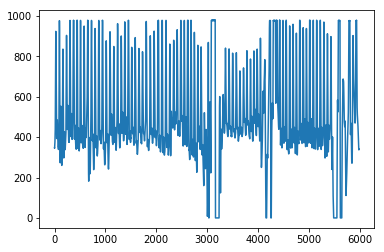

In [41]:
data = hb.get_data('pp8_Som_Ven_C0_data.txt')[:,1]

print(data)

plt.plot(data)
plt.show()

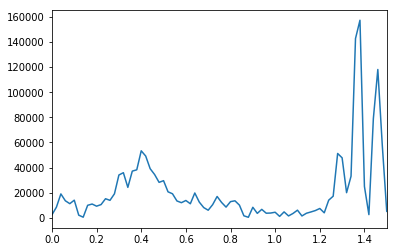

In [42]:
freq, psd = welch(data, fs=100.0, nperseg=5000)

plt.plot(freq, psd)
plt.xlim(0,1.5)
plt.show()

In [43]:
hr = hb.get_data('../data3.csv', column_name='hr')
fs = hb.get_samplerate_datetime(hb.get_data('../data3.csv', column_name='datetime'),timeformat='%Y-%m-%d %H:%M:%S.%f')

original lfhf: 2.0911481586689975


C:\Users\LocalAdmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


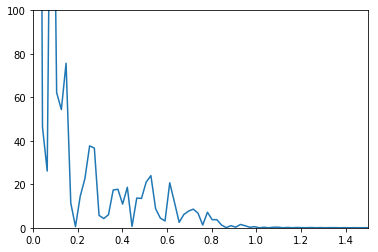

C:\Users\LocalAdmin\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1785: UserWarning: nperseg = 100419 is greater than input length  = 47361, using nperseg = 47361
  .format(nperseg, input_length))


lf: 58107.254032, hf: 32135.286389, lfhf: 1.8082071318308859
23681
[4.51526282e+02 4.06204775e+04 2.19083815e+04 ... 3.72750732e-20
 4.63782400e-20 4.96201618e-20]


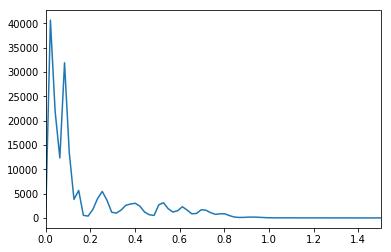

In [93]:
from scipy.interpolate import UnivariateSpline

m = hb.process(data, fs, calc_fft=True)

print('original lfhf:', str(m['lf/hf']))
rr_list = hb.working_data['RR_list_cor']
rr_x = []
pointer = 0
for x in rr_list:
    pointer += x
    rr_x.append(pointer)
rr_x_new = np.linspace(rr_x[0], rr_x[-1], rr_x[-1])
interpolated_func = UnivariateSpline(rr_x, rr_list, k=3)
datalen = len(rr_x_new)

t1 = time.clock()
frq = np.fft.fftfreq(datalen, d=((1/1000.0)))
frq = frq[range(int(datalen/2))]
Y = np.fft.fft(interpolated_func(rr_x_new))/datalen
Y = Y[range(int(datalen/2))]
Y = np.power(Y, 2)
t_fft = time.clock() - t1

plt.plot(frq, abs(Y))
plt.xlim(0,1.5)
plt.ylim(0,100)
plt.show()

t1 = time.clock()
freq, psd = welch(interpolated_func(rr_x_new), fs=1000.0, nperseg=fs*1000)
t_welch = time.clock() - t1

lf = np.trapz(abs(psd[(freq >= 0.05) & (freq <= 0.15)]))
hf = np.trapz(abs(psd[(freq >= 0.15) & (freq <= 0.5)]))
lfhf = lf/hf

print('lf: %f, hf: %f, lfhf: %s' %(lf, hf, lfhf))

print(len(freq))
print(psd)

plt.plot(freq, psd)
plt.xlim(0,1.5)
plt.show()

lf: 40026.862857, hf: 20780.438083, lfhf: 1.9261799340764068


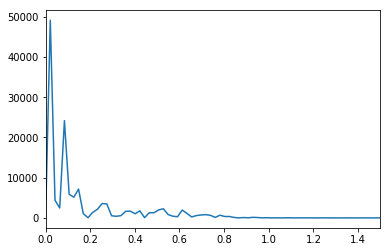

In [71]:
t1 = time.clock()
freq, psd = periodogram(interpolated_func(rr_x_new), fs=1000.0)
t_period = time.clock() - t1


lf = np.trapz(abs(psd[(freq >= 0.05) & (freq <= 0.15)]))
hf = np.trapz(abs(psd[(freq >= 0.15) & (freq <= 0.5)]))
lfhf = lf/hf

print('lf: %f, hf: %f, lfhf: %s' %(lf, hf, lfhf))

plt.plot(freq, psd)
plt.xlim(0,1.5)
plt.show()